In [1]:
from skimage.measure import block_reduce
import numpy as np

import logging

from utils import logging as lg
lg.set_logging(logging.ERROR)
from model import provider, heatmap_evaluation
import matplotlib.pyplot as plt

from notebook_utils import plot 
import config

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
from utils import data_provider

In [3]:
dataset_loader = data_provider.DatasetLoader(data_dir='../data')

# Define functions

In [4]:
def get_data_for_class(data_name, class_idx, no=16, seed=2):
    np.random.seed(seed)

    data = dataset_loader.load(data_name)
    indices = np.argmax(data.test2d.y, axis=1) == class_idx
    if no:
        s = np.random.choice(np.sum(indices), size=no, replace=False)
        return data.test2d.x[indices,:,:][s, :, :], data.test2d.y[indices, :][s, :]
    else:
        return data.test2d.x[indices,:,:]

In [5]:
def plot_digits(data, title=""):
    plt.figure(figsize=(80,20))
    for i in range(data.shape[0]):
        plt.subplot(4,16, i+1)
        plt.imshow(data[i,:,:], cmap='gray')
        plt.xticks([])
        plt.yticks([])
    if title:
        plt.suptitle(title)
    plt.show()

In [6]:
# mnist_8_x, mnist_8_y = get_data_for_class('mnist-3-digits', 8, no=16)
# mnist_maj_8_x, mnist_maj_8_y = get_data_for_class('mnist-3-digits-maj', 8, no=16)

# mnist_9_x, mnist_9_y = get_data_for_class('mnist-3-digits', 9, no=16)
# mnist_maj_9_x, mnist_maj_9_y = get_data_for_class('mnist-3-digits-maj', 9, no=16)

# # mnist_9_maj = get_data_for_class('mnist-3-digits-maj', 9)
# # fmnist_ankle_boots = get_data_for_class('fashion-mnist-3-items', 9)

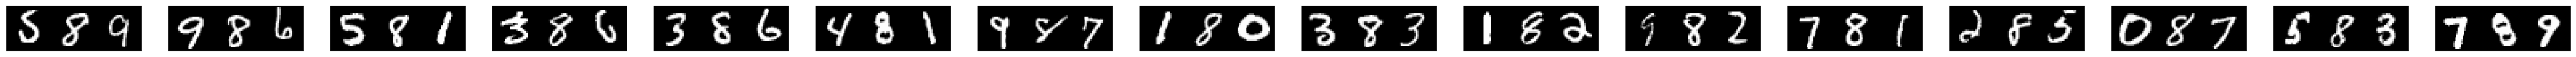

In [7]:
plot_digits(get_data_for_class('mnist-3-digits', 8, no=16)[0])

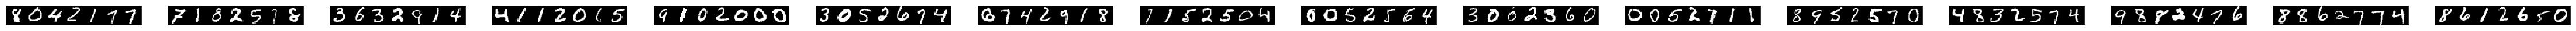

In [18]:
plot_digits(get_data_for_class('mnist-7-digits', 2, no=16)[0])

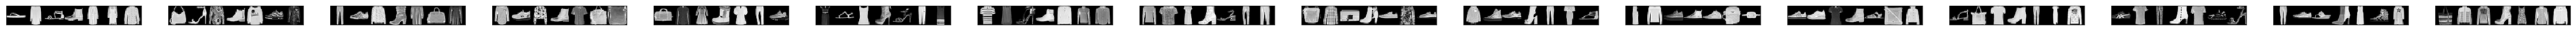

In [9]:
plot_digits(get_data_for_class('fashion-mnist-7-items', 9, no=16)[0])

In [15]:
dd = dataset_loader.load('fashion-mnist-7-items')

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [12]:
# for i in range(10):
#     plot.plot_relevance_methods('../final-models/convdeep_4l_network-mnist-3-digits-maj-seq-12', dataset_loader, data=get_data_for_class('mnist-3-digits-maj', i, no=16), only_positive_rel=True, methods=['sensitivity', 'guided_backprop', 'lrp_alpha2_beta1', 'lrp_deep_taylor'])

In [13]:
# for i in range(10):
#     plot.plot_relevance_methods('../experiment-results/models-for-paper/convdeep_gated_network-mnist-3-digits-maj-seq-12---2018-02-19--00-31-15', dataset_loader, data=get_data_for_class('mnist-3-digits-maj', i, no=16), only_positive_rel=True, methods=['sensitivity', 'guided_backprop', 'lrp_alpha2_beta1', 'lrp_deep_taylor'])

In [14]:
plot.plot_relevance_methods('../final-models/convdeep_4l_network-mnist-3-digits-seq-12', dataset_loader, data=(mnist_8_x, mnist_8_y), only_positive_rel=True, methods=['sensitivity', 'guided_backprop', 'lrp_alpha2_beta1', 'lrp_deep_taylor'])

NameError: name 'mnist_8_x' is not defined